In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [3]:
num_rows = 1000
# create a dictionary of lists
data = {
    "x_1": np.random.normal(0, 1, num_rows),
    "x_2": np.random.normal(0, 1, num_rows),
    "x_3": np.random.normal(0, 1, num_rows),
    "x_4": np.random.normal(0, 1, num_rows),
    "x_5": np.random.normal(0, 1, num_rows),
}
beta = [0.5, 1, 1, 1, 1, 1]

# create a data frame from the dictionary
df = pd.DataFrame(data)
df["comb"] = beta[0] + beta[1] * df["x_1"] + beta[2] * df["x_2"] + beta[3] * df["x_3"] + beta[4] * df["x_4"] + beta[5] * df["x_5"]
df["prob"] = 1 / (1 + np.exp(-df["comb"]))
df["y"] = np.random.binomial(1, df["prob"], num_rows)
df.head(n=10)

,x_1,x_2,x_3,x_4,x_5,comb,prob,y
0,1.447649,-0.113741,1.486221,1.348432,-0.460832,4.207729,0.985338,1
1,0.527767,-0.104799,0.362961,-0.325350,-1.141403,-0.180823,0.454917,1
2,0.715283,0.652308,0.331618,-0.181322,2.123916,4.141804,0.984355,1
3,0.778589,-0.227917,-1.066645,-1.027596,0.891794,-0.151776,0.462129,0
4,-0.507433,-0.718844,-1.276077,0.498375,0.282011,-1.221967,0.227590,0
5,-0.375123,-1.928691,0.662512,1.522978,-0.962553,-0.580878,0.358731,0
6,-0.595582,0.398540,-0.439235,-0.268803,-0.062754,-0.467835,0.385129,0
7,-0.366810,-0.680396,-0.995128,2.502591,0.401565,1.361823,0.796056,1
8,-0.481588,0.315293,-1.541403,0.193169,-0.255291,-1.269821,0.219288,0
9,-1.235703,-1.832326,0.010276,-2.636409,0.742618,-4.451545,0.011526,0


In [4]:
def generate_data(num_rows):
    data = {
        "x_1": np.random.normal(0, 1, num_rows),
        "x_2": np.random.normal(0, 1, num_rows),
        "x_3": np.random.normal(0, 1, num_rows),
        "x_4": np.random.normal(0, 1, num_rows),
        "x_5": np.random.normal(0, 1, num_rows),
    }
    beta = [0.5, 1, 1, 1, 1, 1]

    # create a data frame from the dictionary
    df = pd.DataFrame(data)
    df["comb"] = (
        beta[0]
        + beta[1] * df["x_1"]
        + beta[2] * df["x_2"]
        + beta[3] * df["x_3"]
        + beta[4] * df["x_4"]
        + beta[5] * df["x_5"]
    )
    df["prob"] = 1 / (1 + np.exp(-df["comb"]))
    df["y"] = np.random.binomial(1, df["prob"], num_rows)
    y = df["y"]
    X = df.drop(columns=["y", "prob", "comb"])
    return X, y
    

In [13]:
X, y = generate_data(50)
lm = linear_model.LogisticRegression()
lm.fit(X, y)
print(lm.coef_)
print(lm.intercept_)

[[0.7846083  1.27316216 0.34913268 0.68372492 0.50757362]]
[0.53821932]


In [25]:
regularization = [None, "l1", "l2"]
number_of_sample = [
    50,
    60,
    70,
    80,
    90,
    100,
    150,
    200,
    300,
    500,
    750,
    1000,
    1500,
    2000,
    4000,
    6000,
    8000,
    10000,
]
number_of_repeat = 100

data_frame = pd.DataFrame(columns=["number_of_sample", "regularization", "mse"])
for sample in number_of_sample:
    for reg in regularization:
        for i in range(number_of_repeat):
            X, y = generate_data(sample)
            lm = linear_model.LogisticRegression(penalty=reg, solver="saga")
            lm.fit(X, y)
            if reg is None:
                reg_text = "none"
            else:
                reg_text = reg
            mse = mean_squared_error(lm.coef_[0], [1, 1, 1, 1, 1])
            data_frame = data_frame.append(
                {
                    "number_of_sample": sample,
                    "regularization": reg_text,
                    "mse": mse,
                },
                ignore_index=True,
            )

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/var/folders/g0/c58bxqzn6djcv8sqkxtcj8dc0000gn/T/ipykernel_37601/4044570551.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(
/var/folders/g0/c58bxqzn6djcv8sqkxtcj8dc0000gn/T/ipykernel_37601/4044570551.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(
/var/folders/g0/c58bxqzn6djcv8sqkxtcj8dc0000gn/T/ipykernel_37601/4044570551.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(
/var/folders/g0/c58bxqzn6djcv8sqkxtcj8dc0000gn/T/ipykernel_37601/4044570

Text(0.5, 1.0, 'aaa')

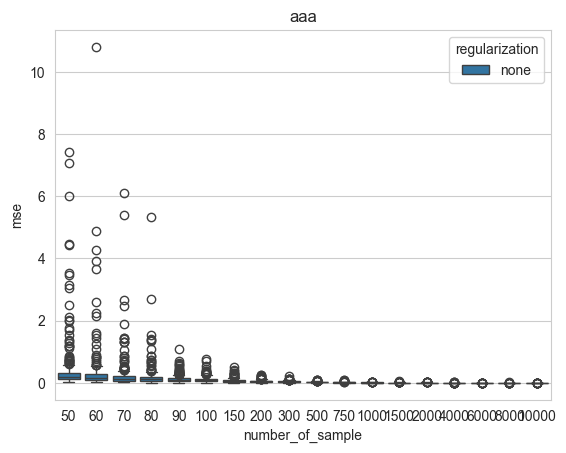

In [26]:
sns.set_style("whitegrid")
sns.boxplot(x="number_of_sample", y="mse", data=data_frame, hue="regularization")
plt.title(
    "aaa"
)